In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Matrices and Linear Functions

In the last section, we saw examples of both linear and non-linear functions. In this section, we continue this discussion, again focusing on the example of linear functions from $\mathbb{R}^2$ to $\mathbb{R}^2$, which allows us to visualize the transformations.

## Matrix multiplication and linear functions

Here, we focus on linear functions of the form

$$
f(\boldsymbol{v}) = \boldsymbol{Av} .
$$

Where $\boldsymbol{A} = \begin{bmatrix}a_{11} & a_{12}\\ a_{21}& a_{22}\end{bmatrix}$ is a $2\times 2$ matrix and $\boldsymbol{v} = (v_1,v_2)$ is a vector in $\mathbb{R}^2$.
When we write $\boldsymbol{Av}$, we mean that we are multiplying the vector $\boldsymbol{v}$ by the matrix $\boldsymbol{A}$, namely:

$$
\boldsymbol{Av} = \begin{bmatrix}a_{11} & a_{12}\\ a_{21}& a_{22}\end{bmatrix}\begin{bmatrix}v_1\\ v_2\end{bmatrix} = \begin{bmatrix}a_{11}v_1 + a_{12}v_2\\ a_{21}v_1 + a_{22}v_2\end{bmatrix}
$$

So $\boldsymbol{Av}$ just gives us another vector in $\mathbb{R}^2$.

It is easy to verify that matrix multiplication satisfies the properties of a linear function: namely for any scalar $\alpha \in \mathbb{R}$ and vectors $\boldsymbol{u},\boldsymbol{v}\in \mathbb{R}^2$, we have

$$
\boldsymbol{A}(\alpha \boldsymbol{v}) = \alpha \boldsymbol{Av}\\
\boldsymbol{A}(\boldsymbol{u}+\boldsymbol{v}) = \boldsymbol{Au} + \boldsymbol{Av}
$$

That means that any function of the form $f(\boldsymbol{v}) = \boldsymbol{Av}$ is a linear function.
In addition, _every_ linear function can be represented in this way.
In other words _every_ linear function $f(\boldsymbol{v})$ can be written as $f(\boldsymbol{v}) = \boldsymbol{Av}$ for some matrix $\boldsymbol{A}$.
This is truly the heart of why matrices are important: they represent linear functions.
While we may be tempted to think of matrices as multi-dimensional arrays storing numbers, it is important that we understand that they are really just a convenient representation for linear functions.

(A slight wrinkle on what we just said: this is true once a basis is given, e.g., the standard/canonical basis, or some other basis.  Then, a linear function can be represetned by a matrix, and vice versa.  A given linear function can be expressed by different matrices when a different basis is given.  In data science, we definitely are interested in representing the same linear function with respect to different basis, e.g., that is what PCA is all about, but let's not worry about that for now, and let's assume that we are working with the standard basis.)

Now that we understand this fact, given a linear function $f:\mathbb{R}^2 \to \mathbb{R}^2$, how can we find the corresponding matrix $\boldsymbol{A}$? To do this, we need to identify the numbers $a_{11},a_{12},a_{21},a_{22}$. A convenient way of finding these numbers is by checking how $f$ acts on the standard basis vectors $\boldsymbol{e}_1 = (1,0)$ and $\boldsymbol{e}_2 = (0,1)$. Let's check what $\boldsymbol{Ae}_1$ and $\boldsymbol{Ae}_2$ give us:


$$
\boldsymbol{A}\boldsymbol{e}_1 =\begin{bmatrix}a_{11} & a_{12}\\ a_{21}& a_{22}\end{bmatrix}\begin{bmatrix}1\\ 0\end{bmatrix}= \begin{bmatrix}a_{11}1 + a_{12}0\\ a_{21}1 + a_{22}0\end{bmatrix} = \begin{bmatrix}a_{11}\\ a_{21}\end{bmatrix}\\
\boldsymbol{Ae}_2 =\begin{bmatrix}a_{11} & a_{12}\\ a_{21}& a_{22}\end{bmatrix}\begin{bmatrix}0\\ 1\end{bmatrix}= \begin{bmatrix}a_{11}0 + a_{12}1\\ a_{21}0 + a_{22}1\end{bmatrix} = \begin{bmatrix}a_{12}\\ a_{22}\end{bmatrix}
$$



These two vectors are exactly equal to the two columns of $\boldsymbol{A}$! Therefore, as long as we know what $f(\boldsymbol{e}_1)$ and $f(\boldsymbol{e}_2)$ are, we can entirely identify what the entries of the matrix $\boldsymbol{A}$ are.

In what follows, we see a few important examples of how to do this, using similar examples to the ones we studied in the previous section.

### Rotating

Let's start again with an example of rotation.

Recall the function $f(\boldsymbol{v})$ which takes any vector $\boldsymbol{v} = (v_1,v_2)$ and rotates it by $\theta$ degrees. This function is given by the following:

$$
f(v_1, v_2) = \left(\cos(\theta)v_1 - \sin(\theta)v_2, \sin(\theta)v_1 + \cos(\theta)v_2\right)
$$

We implement this function below with $\theta = 45^\circ$ as the default.

In [2]:
def rotate(v, theta=np.pi/4):
    return np.array([np.cos(theta)*v[0] - np.sin(theta)*v[1], np.sin(theta)*v[0] + np.cos(theta)*v[1]])

Now let's visualize how this function acts on the standard basis vectors $\boldsymbol{e}_1,\boldsymbol{e}_2$, and try and deduce what the corresponding matrix associated with this linear function is.

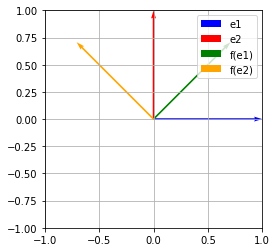

In [3]:
origin = np.zeros(2)
e1 = np.array([1,0])
e2 = np.array([0,1])

plt.quiver(*origin, *e1, label='e1', color='blue', scale=1, units='xy')
plt.quiver(*origin, *e2, label='e2', color='red', scale=1, units='xy')
plt.quiver(*origin, *rotate(e1), label='f(e1)', color='green', scale=1, units='xy')
plt.quiver(*origin, *rotate(e2), label='f(e2)', color='orange',scale=1, units='xy')
plt.legend()
plt.grid()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')
plt.show()

Here, the blue vector is $\boldsymbol{e}_1$, the red vector is $\boldsymbol{e}_2$, the green vector is $f(\boldsymbol{e}_1)$, and the orange vector is $f(\boldsymbol{e}_2)$.
As we can see from the plot, we have $f(\boldsymbol{e}_1) \approx (0.7, 0.7)$ and $f(\boldsymbol{e}_2) \approx (-0.7, 0.7)$. Indeed, let's check:

In [4]:
print('f(e1) = ', rotate(e1))
print('f(e2) = ', rotate(e2))

f(e1) =  [0.70710678 0.70710678]
f(e2) =  [-0.70710678  0.70710678]


Indeed, this is what we would expect: if we take the vector $(1,0)$ and rotate $45^\circ$, it is still a unit vector, but is on the $y=x$ line, and therefore must be $(1/\sqrt{2}, 1/\sqrt{2})$. Therefore, we have


$$
f(\boldsymbol{e}_1) = \begin{bmatrix}\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\end{bmatrix},\;\;\; f(\boldsymbol{e}_2) = \begin{bmatrix}-\frac{1}{\sqrt{2}}\\\frac{1}{\sqrt{2}}\end{bmatrix}
$$



As we showed above, since $f$ is a linear function, we must have that $f(\boldsymbol{v}) = \boldsymbol{Av}$ for some matrix $\boldsymbol{A}$, and the columns of $\boldsymbol{A}$ are given by $f(\boldsymbol{e}_1)$ and $f(\boldsymbol{e}_2)$.
Therefore, we deduce that the matrix $\boldsymbol{A}$ must be


$$
\boldsymbol{A} = \begin{bmatrix}\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}\\ \frac{1}{\sqrt{2}} &\frac{1}{\sqrt{2}}\end{bmatrix}
$$



In Python, we can store this matrix as a numpy array as follows:

In [5]:
A = np.array([[1/np.sqrt(2),-1/np.sqrt(2)], [1/np.sqrt(2),1/np.sqrt(2)]])
A

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Now since $f(\boldsymbol{v}) = \boldsymbol{Av}$, we realize that we don't actually need to use the function `rotate` to implement $f$: instead, we simply do matrix-vector multiplication to get the function! To do this, we can use the `np.dot` function.
Let's make the same plot as before, but instead computing the rotation this way:

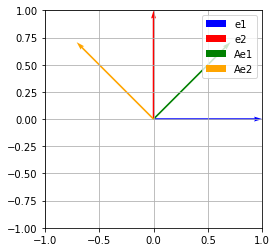

In [6]:
e1_rotated = np.dot(A, e1)
e2_rotated = np.dot(A, e2)

plt.quiver(*origin, *e1, label='e1', color='blue', scale=1, units='xy')
plt.quiver(*origin, *e2, label='e2', color='red', scale=1, units='xy')
plt.quiver(*origin, *e1_rotated, label='Ae1', color='green', scale=1, units='xy')
plt.quiver(*origin, *e2_rotated, label='Ae2', color='orange',scale=1, units='xy')
plt.legend()
plt.grid()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')
plt.show()

As expected, we get the same result as before! Indeed, now that we've found the matrix $\boldsymbol{A}$, we can use `np.dot(A,v)` to compute $f(\boldsymbol{v})$ for any vector $\boldsymbol{v} \in \mathbb{R}^2$. Let's see a couple more examples with $\boldsymbol{u} = (-.2, .5), \boldsymbol{v}= (.9, -.3)$:

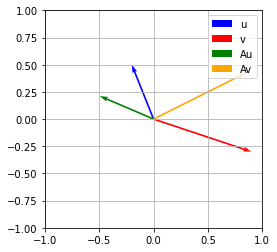

In [7]:
u = np.array([-.2, .5])
v = np.array([.9, -.3])

plt.quiver(*origin, *u, label='u', color='blue', scale=1, units='xy')
plt.quiver(*origin, *v, label='v', color='red', scale=1, units='xy')
plt.quiver(*origin, *np.dot(A,u), label='Au', color='green', scale=1, units='xy')
plt.quiver(*origin, *np.dot(A,v), label='Av', color='orange',scale=1, units='xy')
plt.legend()
plt.grid()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')
plt.show()

### Stretching

Next, we again consider the function $f(\boldsymbol{v})$ which takes a vector $\boldsymbol{v} = (v_1,v_2)$ and 'stretches' it by a factor of $\alpha$ along the x-axis and  $\beta$ along the y-axes.
The function which performs this operations is given by

$$
f(v_1,v_2) = (\alpha v_1, \beta v_2)
$$

Let's implement it in a simple Python function, with $\alpha=2,\beta=1$ as the default, and see how it acts on the standard basis vectors.

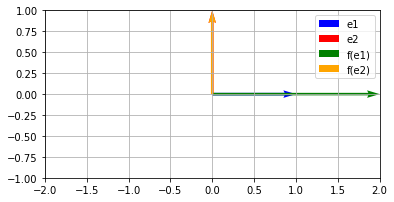

In [8]:
def stretch(v, alpha=2, beta=1):
    return np.array([alpha*v[0], beta*v[1]])

plt.quiver(*origin, *e1, label='e1', color='blue', scale=1, units='xy')
plt.quiver(*origin, *e2, label='e2', color='red', scale=1, units='xy')
plt.quiver(*origin, *stretch(e1), label='f(e1)', color='green', scale=1, units='xy')
plt.quiver(*origin, *stretch(e2), label='f(e2)', color='orange',scale=1, units='xy')
plt.legend()
plt.grid()
plt.xlim(-2,2)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')
plt.show()

As we can tell from the plot, we have that $f(\boldsymbol{e}_1) = (2,0)$ and $f(\boldsymbol{e}_2) = (0,1)$. It makes sense that $\boldsymbol{e}_2$ is unchanged after applying $f$, since it is zero in the x-axis direction. Hence the function $f$ can be written as $f(\boldsymbol{v}) = \boldsymbol{Bv}$ where the matrix $\boldsymbol{B}$ is given by


$$
\boldsymbol{B} = \begin{bmatrix}2 & 0\\ 0&1\end{bmatrix}
$$


Let's define this as a numpy array.

In [9]:
B = np.array([[2,0], [0,1]])
B

array([[2, 0],
       [0, 1]])

Now we can check that $\boldsymbol{Bv}$ indeed gives the same results as $f(\boldsymbol{v})$:

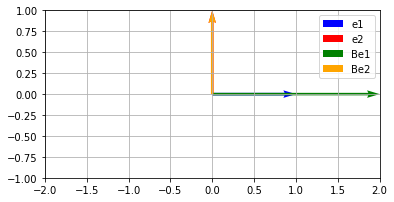

In [10]:
e1_stretched = np.dot(B, e1)
e2_stretched = np.dot(B, e2)

plt.quiver(*origin, *e1, label='e1', color='blue', scale=1, units='xy')
plt.quiver(*origin, *e2, label='e2', color='red', scale=1, units='xy')
plt.quiver(*origin, *e1_stretched, label='Be1', color='green', scale=1, units='xy')
plt.quiver(*origin, *e2_stretched, label='Be2', color='orange',scale=1, units='xy')
plt.legend()
plt.grid()
plt.xlim(-2,2)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')
plt.show()

As expected, $f(\boldsymbol{v})$ and $\boldsymbol{Bv}$ are the same.

### Projecting

The last example is the function


$$
f(v_1,v_2) = \left(\frac{1}{2}(v_1 + v_2), \frac{1}{2}(v_1 + v_2)\right)
$$

which takes any vector $\boldsymbol{v} = (v_1,v_2)$, and maps it to an element of the set $L = \{(x,y)\mid x=y\}$, which is just the $y=x$ line in the plane. We implement it below, and plot how it acts on the standard basis vectors.

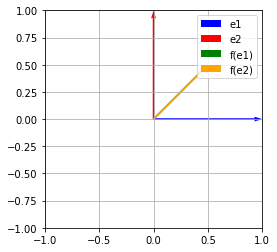

In [11]:
def project_to_line(v):
    return np.array([0.5*(v[0] + v[1]), 0.5*(v[0] + v[1])])

plt.quiver(*origin, *e1, label='e1', color='blue', scale=1, units='xy')
plt.quiver(*origin, *e2, label='e2', color='red', scale=1, units='xy')
plt.quiver(*origin, *project_to_line(e1), label='f(e1)', color='green', scale=1, units='xy')
plt.quiver(*origin, *project_to_line(e2), label='f(e2)', color='orange',scale=1, units='xy')
plt.legend()
plt.grid()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')
plt.show()

The orange and green vectors (representing $f(\boldsymbol{e}_1)$ and $f(\boldsymbol{e}_2)$) are both equal to $(1/2, 1/2)$, and so the matrix $\boldsymbol{C}$ for which $f(\boldsymbol{v}) = \boldsymbol{Cv}$ is given by


$$
\boldsymbol{C} = \begin{bmatrix}\frac{1}{2} & \frac{1}{2}\\ \frac{1}{2} &\frac{1}{2}\end{bmatrix}
$$


We define this as a numpy array:

In [12]:
C = np.array([[1./2, 1./2], [1./2, 1./2]])
C

array([[0.5, 0.5],
       [0.5, 0.5]])

Now we can check that $\boldsymbol{Cv}$ indeed gives the same results as $f(\boldsymbol{v})$:

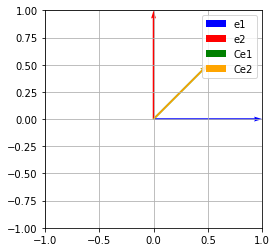

In [13]:
e1_projected = np.dot(C, e1)
e2_projected = np.dot(C, e2)

plt.quiver(*origin, *e1, label='e1', color='blue', scale=1, units='xy')
plt.quiver(*origin, *e2, label='e2', color='red', scale=1, units='xy')
plt.quiver(*origin, *e1_projected, label='Ce1', color='green', scale=1, units='xy')
plt.quiver(*origin, *e2_projected, label='Ce2', color='orange',scale=1, units='xy')
plt.legend()
plt.grid()
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal')
plt.show()

As expected, $f(\boldsymbol{v})$ and $\boldsymbol{Cv}$ are the same.

## Finding the composition of linear functions with matrix multiplication

An important operation which we've discussed is function composition. When working with linear functions, represented as matrices, function composition can be represented by matrix multiplication. Specifically, if we have linear functions $f(\boldsymbol{v}) = \boldsymbol{Av}$ and $g(\boldsymbol{v}) = \boldsymbol{Bv}$, where $\boldsymbol{A}, \boldsymbol{B}$ are matrices, then we can compute the composition as follows:


$$
(f\circ g)(\boldsymbol{v}) = f(g(\boldsymbol{v})) = f(\boldsymbol{Bv}) = (\boldsymbol{AB})\boldsymbol{v}
$$


where here $\boldsymbol{AB}$ is the matrix product of $\boldsymbol{A}$ and $\boldsymbol{B}$. For $2\times 2$ matrices


$$
\boldsymbol{A} = \begin{bmatrix}a_{11} & a_{12}\\ a_{21}& a_{22}\end{bmatrix},\;\;\; \boldsymbol{B}=\begin{bmatrix}b_{11} & b_{12}\\ b_{21}& b_{22}\end{bmatrix}
$$


the product $\boldsymbol{AB}$ is given by


$$
\boldsymbol{AB} = \begin{bmatrix}a_{11} & a_{12}\\ a_{21}& a_{22}\end{bmatrix}\begin{bmatrix}b_{11} & b_{12}\\ b_{21}& b_{22}\end{bmatrix} = \begin{bmatrix}a_{11}b_{11} + a_{12}b_{21}& a_{11}b_{12}+a_{12}b_{22}\\ a_{21}b_{11}+a_{22}b_{22}&a_{21}b_{12}+a_{22}b_{22}\end{bmatrix}
$$


which is just another $2\times 2$ matrix. Therefore, to compute the composition of two linear functions $f(\boldsymbol{v}) = \boldsymbol{Av}$, $g(\boldsymbol{v})=\boldsymbol{Bv}$, we can first compute the matrix $\boldsymbol{AB}$, and then apply this new matrix to a vector $\boldsymbol{v}$.

Let's see a few examples of doing this. To visualize compositions, we'll use the same method from the previous workbook of plotting how the linear functions act on points on the unit circle.

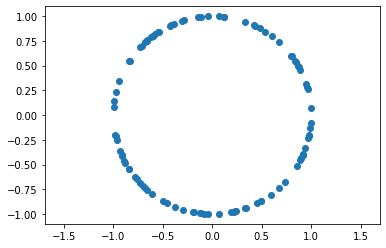

In [14]:
np.random.seed(345) #set random seed

n_points = 100
vv = np.random.normal(size = (2, n_points))
vv /= np.linalg.norm(vv, axis=0)
plt.scatter(vv[0], vv[1])
plt.axis('equal')
plt.show()

#### Rotating and stretching

Let's consider the matrices $\boldsymbol{A}$ and $\boldsymbol{B}$, defined above, which rotate a vector by $45^\circ$ and stretch a vector by a factor of 2 on the x-axis, respectively. Let's define a new matrix $\boldsymbol{AB}$, representing the composition of first stretching, then applying a rotation.

In [15]:
AB = np.dot(A, B)
AB

array([[ 1.41421356, -0.70710678],
       [ 1.41421356,  0.70710678]])

  This gives us the matrix


$$
\boldsymbol{AB} = \begin{bmatrix}\sqrt{2} & -1/\sqrt{2}\\ \sqrt{2}&1/\sqrt{2} \end{bmatrix}
$$


Let's verify visually that this does indeed first stretch the vectors on the circle, forming an ellipse, and then rotate them.

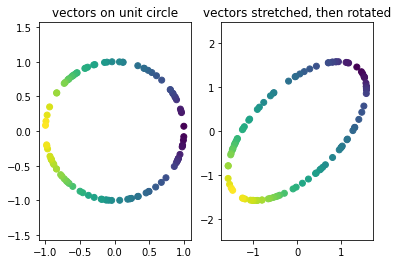

In [16]:
#here we sort the points by their angles from the origin so that the plot coloring looks nice
angles = np.arccos(np.dot(vv.T, np.array([1,0])).flatten())
angles_ix = np.argsort(angles)
vv = vv[:, angles_ix]

composed_vv = np.dot(AB, vv)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(vv[0], vv[1], c=np.arange(n_points))
ax2.scatter(composed_vv[0], composed_vv[1], c=np.arange(n_points))
ax1.axis('equal')
ax2.axis('equal')
ax1.set_title('vectors on unit circle')
ax2.set_title('vectors stretched, then rotated')
plt.show()

As we can see, this does exactly what we'd expect, and gives the same result as the composition from the previous workbook: it first stretches along the x-axis to form an ellipse, and then rotates each of the points by $45^\circ$.

Next, let's try first rotating, and then stretching. This action is represented by the matrix $\boldsymbol{BA}$, which we define below.

In [17]:
BA = np.dot(B, A)
BA

array([[ 1.41421356, -1.41421356],
       [ 0.70710678,  0.70710678]])

  This gives us the matrix


$$
\boldsymbol{BA} = \begin{bmatrix}\sqrt{2} & -\sqrt{2}\\ 1/\sqrt{2}&1/\sqrt{2} \end{bmatrix}
$$
Note that clearly $\boldsymbol{AB} \neq \boldsymbol{BA}$: in general we do not have that matrix multiplication commutes. This corresponds to the fact that the composition of linear functions is not commutative. We can see this visually by plotting how $\boldsymbol{BA}$ acts on points on the circle.

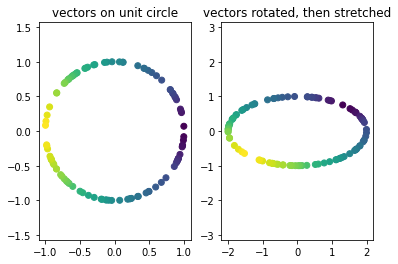

In [18]:
composed_vv2 = np.dot(BA, vv)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(vv[0], vv[1], c=np.arange(n_points))
ax2.scatter(composed_vv2[0], composed_vv2[1], c=np.arange(n_points))
ax1.axis('equal')
ax2.axis('equal')
ax1.set_title('vectors on unit circle')
ax2.set_title('vectors rotated, then stretched')
plt.show()